In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:

df = pd.read_csv(r"C:\Users\kusha\OneDrive\Desktop\diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
ohe_encoder=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')
std_scaler=StandardScaler()

In [5]:
Nominal_Col=['gender','smoking_history']
Nominal_transformed_df=ohe_encoder.fit_transform(df[Nominal_Col])
df=pd.concat([df,Nominal_transformed_df],axis=1).drop(columns=Nominal_Col)

In [6]:
Std_cols=['age','bmi','HbA1c_level','blood_glucose_level']
df[Std_cols]=std_scaler.fit_transform(df[Std_cols])

In [7]:
X=df.drop(columns=['diabetes'])
y=df['diabetes']

In [8]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.33,random_state=42,
                                              stratify=y)

smote=SMOTE(random_state=42,sampling_strategy=0.3)
X_train_res,y_train_res=smote.fit_resample(X_train,y_train)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
rf_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train models
rf_model.fit(X_train_res, y_train_res)
lr_model.fit(X_train_res, y_train_res)
xgb_model.fit(X_train_res, y_train_res)

C:\Users\Sanjana Sree\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [11:36:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30195
           1       0.87      0.71      0.78      2805

    accuracy                           0.97     33000
   macro avg       0.92      0.85      0.88     33000
weighted avg       0.97      0.97      0.97     33000

Random Forest Accuracy Score: 0.9666060606060606
Random Forest Recall Score: 0.714795008912656
Random Forest F1 Score: 0.7844287949921753
Random Forest Accuracy Score: 0.9666060606060606
Random Forest Recall Score: 0.714795008912656


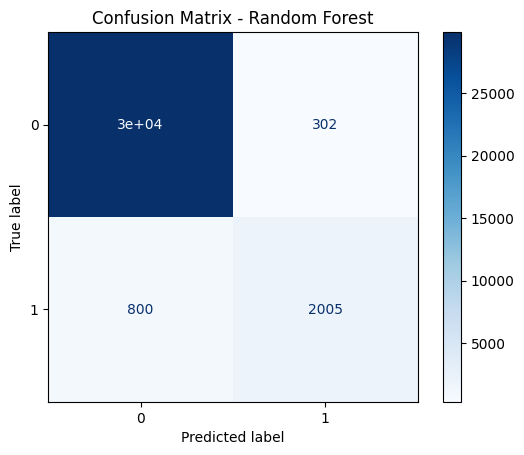


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     30195
           1       0.42      0.88      0.57      2805

    accuracy                           0.89     33000
   macro avg       0.70      0.88      0.75     33000
weighted avg       0.94      0.89      0.90     33000

Logistic Regression Accuracy Score: 0.8861212121212121
Logistic Regression Recall Score: 0.8816399286987522
Logistic Regression F1 Score: 0.5682444852941176
Logistic Regression Accuracy Score: 0.8861212121212121
Logistic Regression Recall Score: 0.8816399286987522


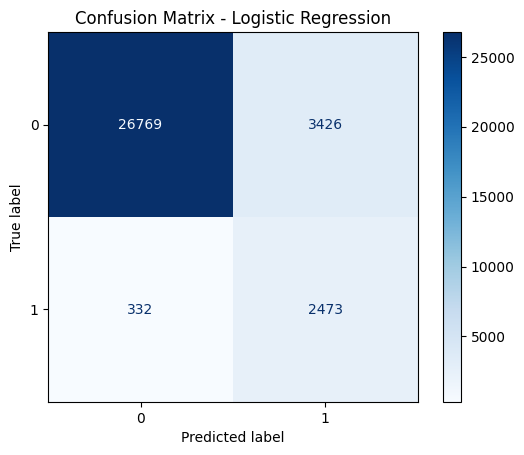


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30195
           1       0.93      0.71      0.80      2805

    accuracy                           0.97     33000
   macro avg       0.95      0.85      0.89     33000
weighted avg       0.97      0.97      0.97     33000

XGBoost Accuracy Score: 0.9704848484848485
XGBoost Recall Score: 0.7073083778966132
XGBoost F1 Score: 0.8029138000809389
XGBoost Accuracy Score: 0.9704848484848485
XGBoost Recall Score: 0.7073083778966132


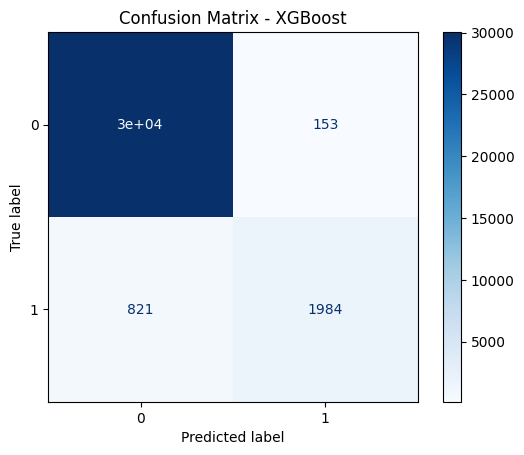

Best Model: XGBoost with the highest F1 Score: 0.8029138000809389


In [ ]:
models = {'Random Forest': rf_model, 'Logistic Regression': lr_model, 'XGBoost': xgb_model}

best_model = None
best_score = 0
best_name = ''

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    from sklearn.metrics import f1_score
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = model.score(X_test, y_test)
    print(f"{name} Accuracy Score: {accuracy}")
    print(f"{name} Recall Score: {recall}")
    print(f"{name} F1 Score: {f1}")
    accuracy = model.score(X_test, y_test)
    print(f"{name} Accuracy Score: {accuracy}")
    print(f"{name} Recall Score: {recall}")
    if f1 > best_score:  
        best_score = f1
        best_recall = recall
        best_model = model
        best_name = name

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

print(f"Best Model: {best_name} with the highest F1 Score: {best_score}")